In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/DS1final/code"

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd
import numpy as np

! pip install sweetviz 
import sweetviz as sv

     |████████████████████████████████| 15.1 MB 11.0 MB/s eta 0:00:01


# load and merge data

load all datas

In [4]:
# !ls "../Dataset/NCES"

In [5]:
path = "../Dataset/"

## NCES data

financial columns we need:
* pp_total_raw_DC: per-pupil total expenditure total
* pp_site_raw_DC: per-pupil site expenditure total
* pp_centshare_raw_DC: per-pupil site-share of central expenditure total
* schoolstloc_raw_DC: total school state and local expenditures (not per-pupil)
* schtype_raw_DC: school type
* ward_raw_DC: state assigned identification ward number

In [24]:
def nces_process(data):

    # get columns we need
    cols = data.columns
    finan_cols =  ['pp_total_raw_DC', 'pp_site_raw_DC', 'pp_centshare_raw_DC', 'schoolstloc_raw_DC', \
                    'schtype_raw_DC', 'ward_raw_DC']
    other_cols = ['level', 'enroll_raw_DC']
    if 'nces_freelunch' in data:
        other_cols += ['nces_freelunch', 'nces_reducedlunch']
        
    cols_need = list(cols[0:5]) + finan_cols + other_cols
    data = data[cols_need]

    #delete cols have constant value except state and year
    drop_cols = list(data.columns[data.nunique() <= 1])[2:] 
    data = data.drop(drop_cols, axis=1)

    #transfer col to some numeric data and fill null w/ empty value
    num_cols = ['enroll_raw_DC', 'ward_raw_DC', 'schoolstloc_raw_DC'] + \
                [col for col in data if col.startswith('pp')]
    for col in num_cols:
        data[col] = pd.to_numeric( data[col], errors='coerce')
    

    return data

                                             |          | [  0%]   00:00 -> (? left)


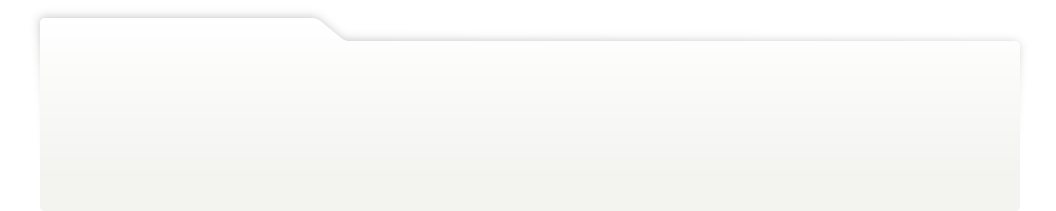
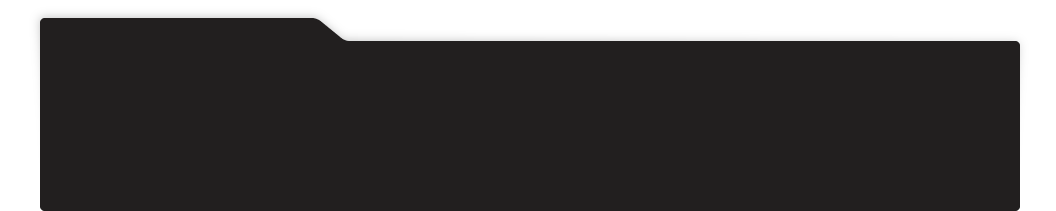
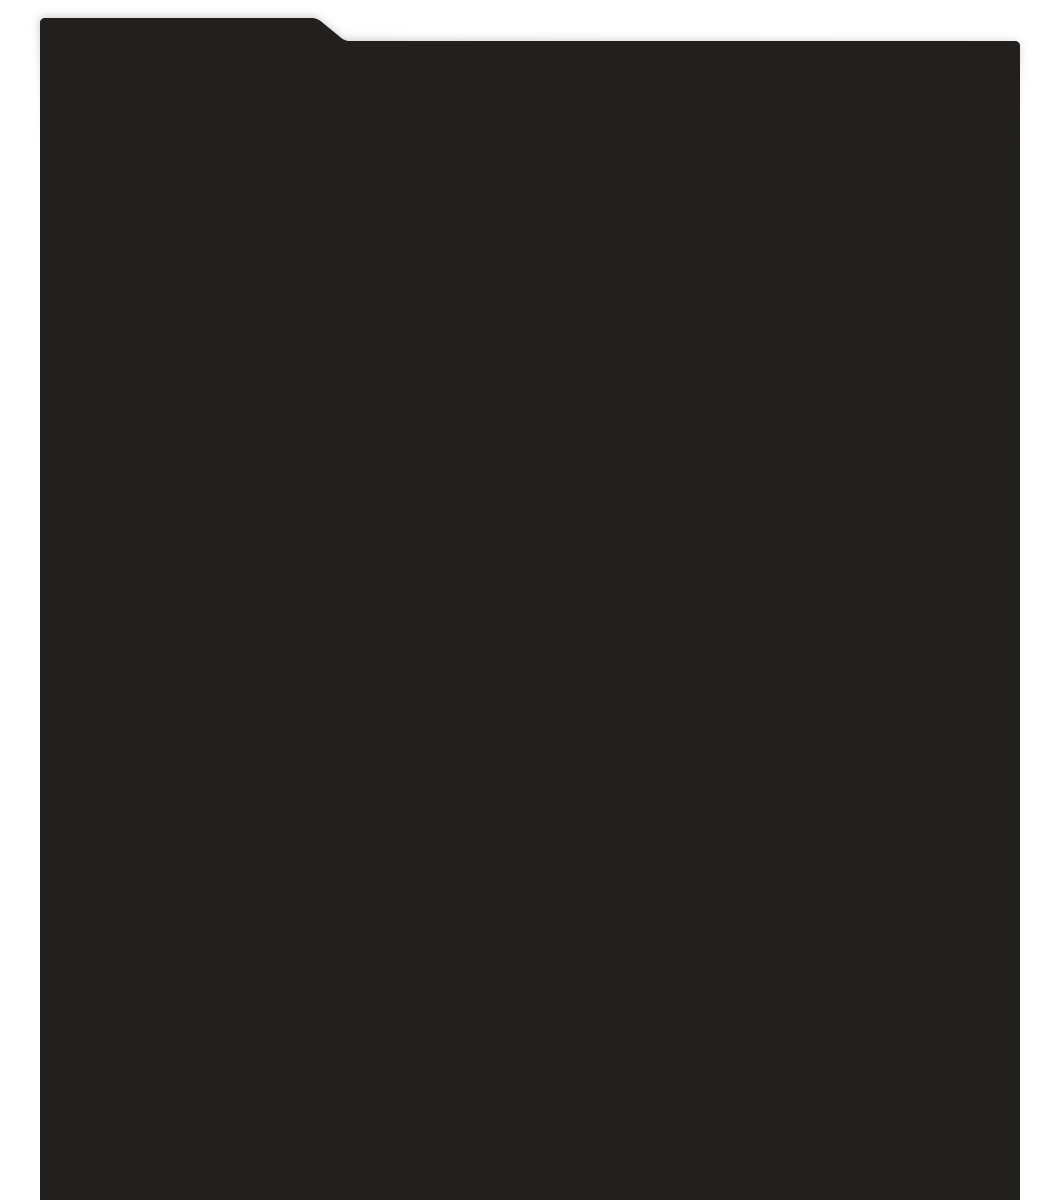
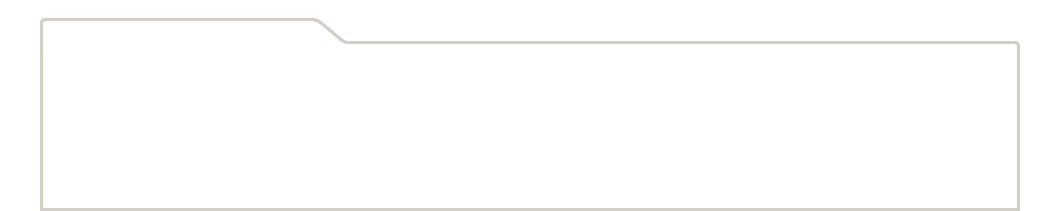
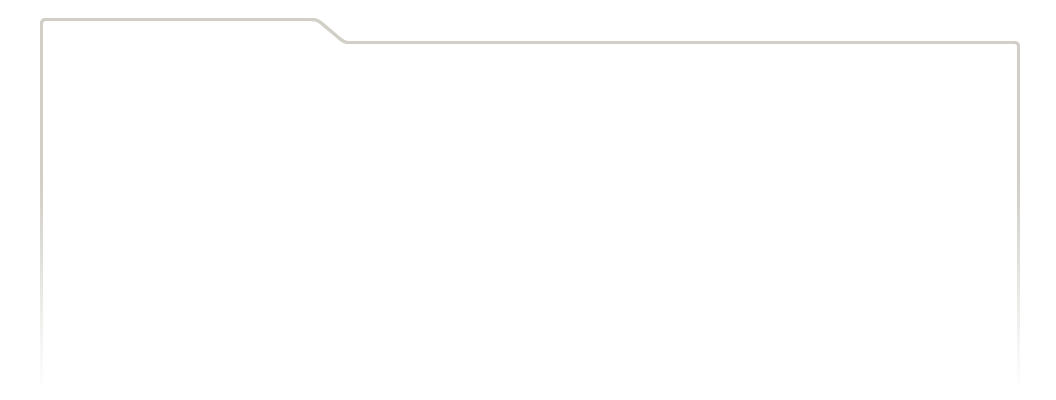
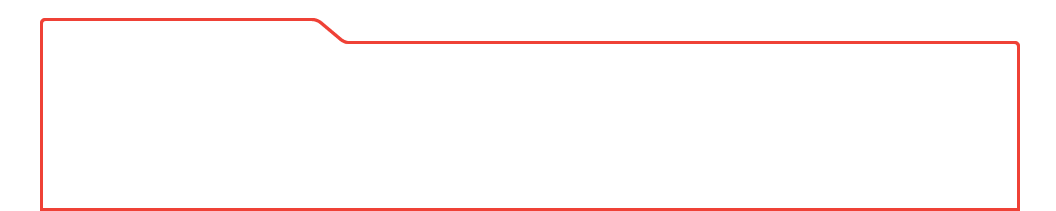
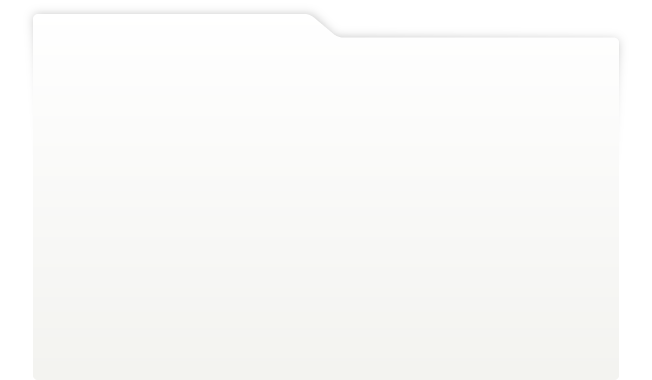
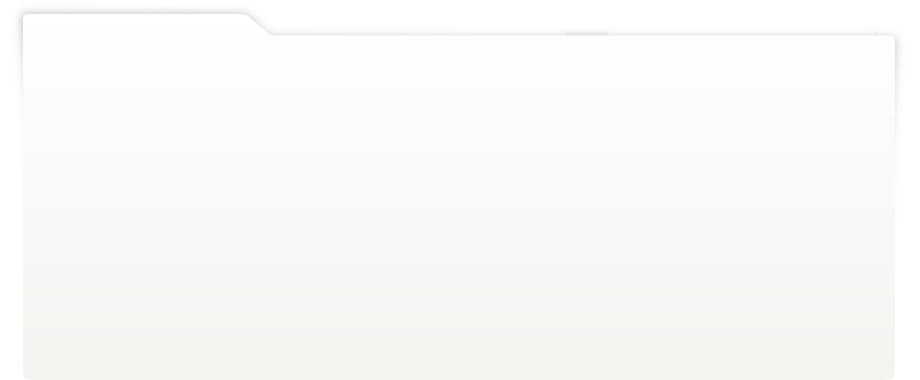
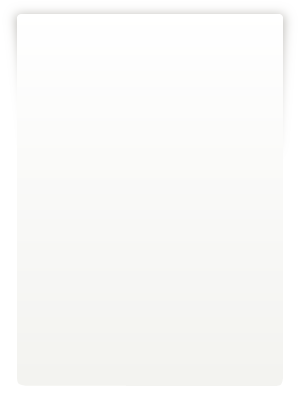
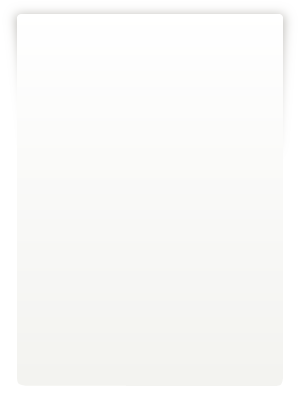
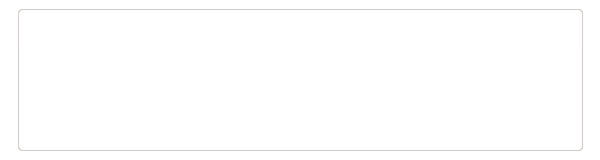
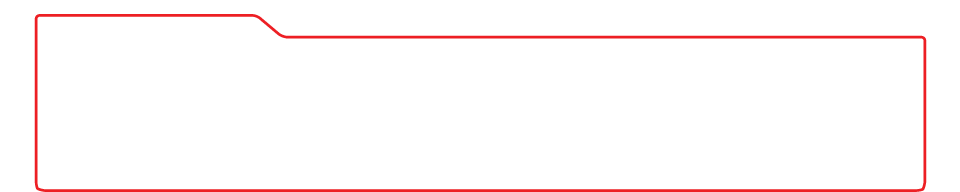
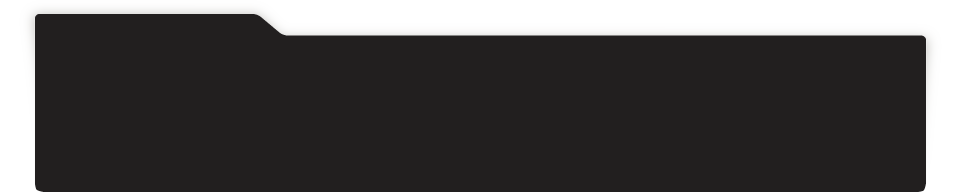
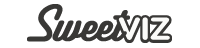
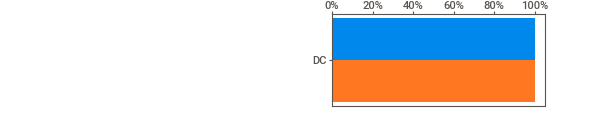
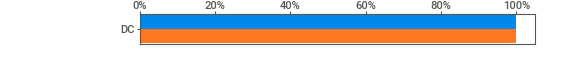
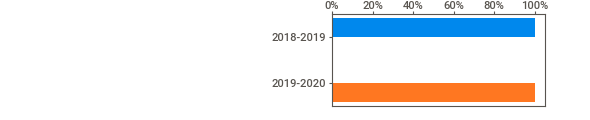
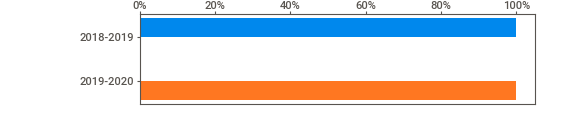
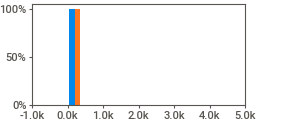
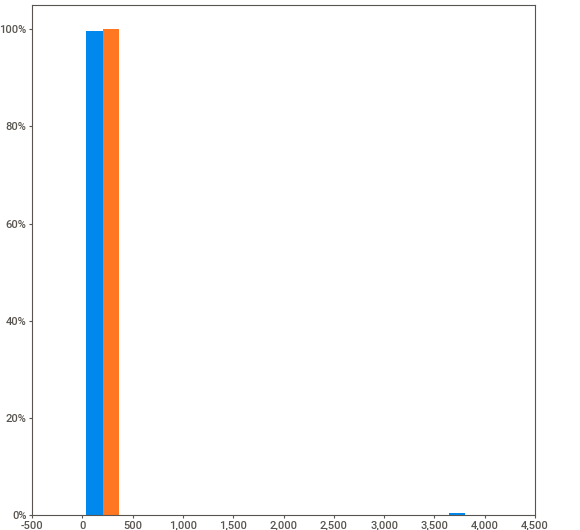
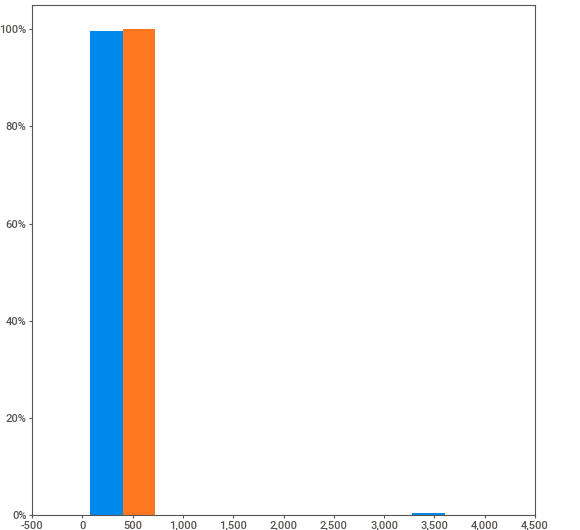
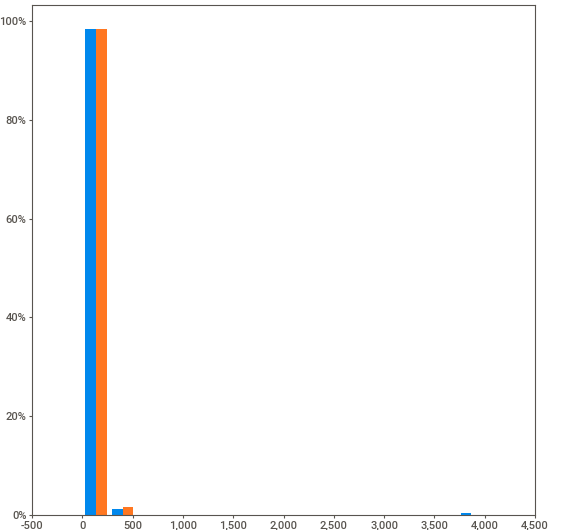
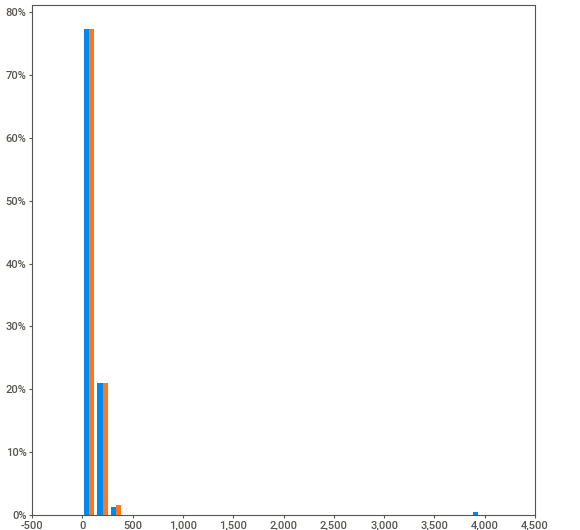
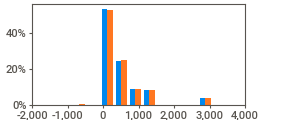
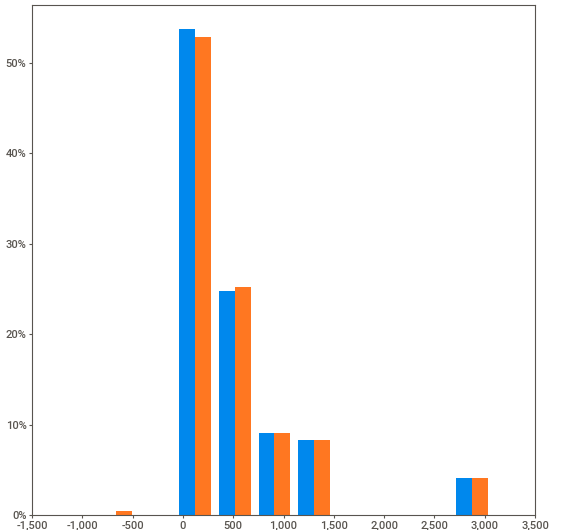
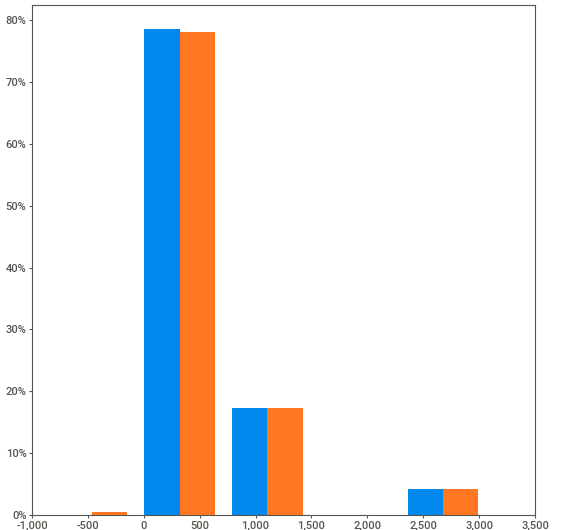
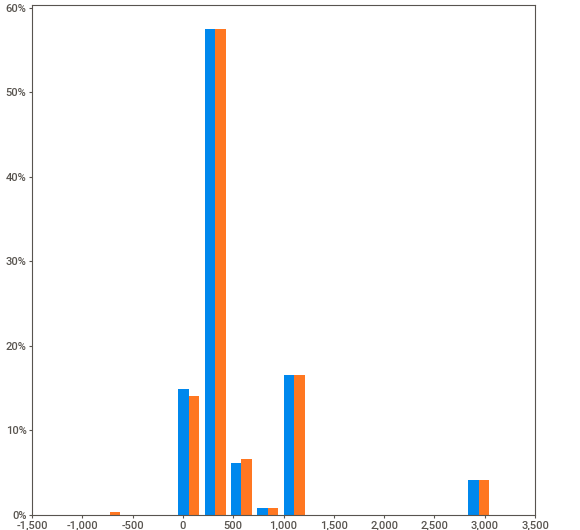
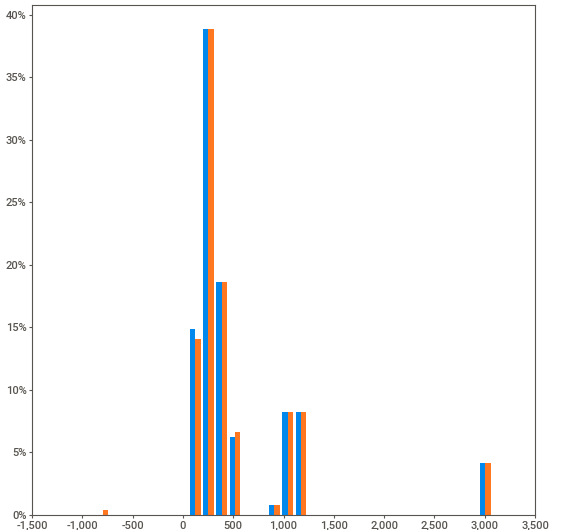
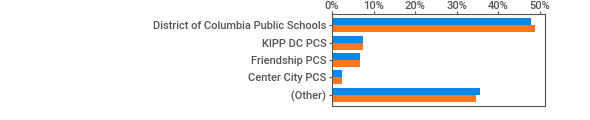
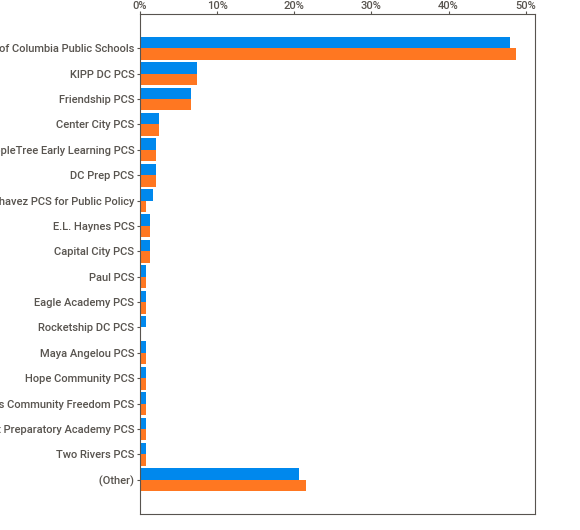
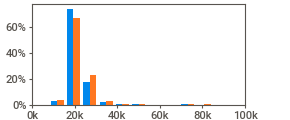
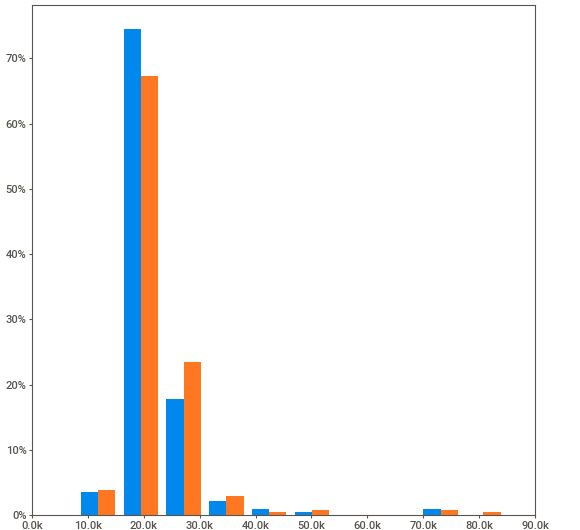
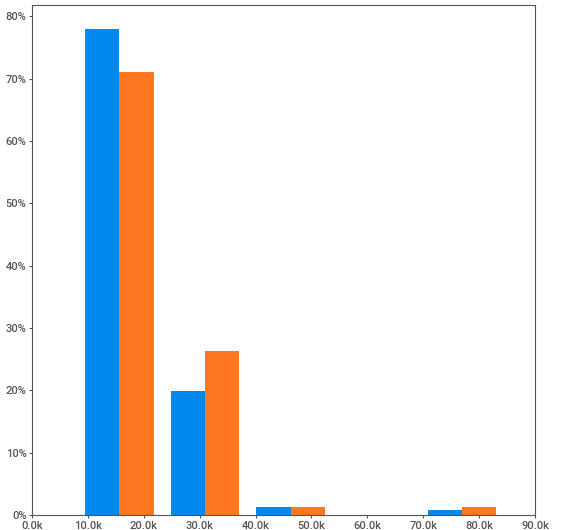
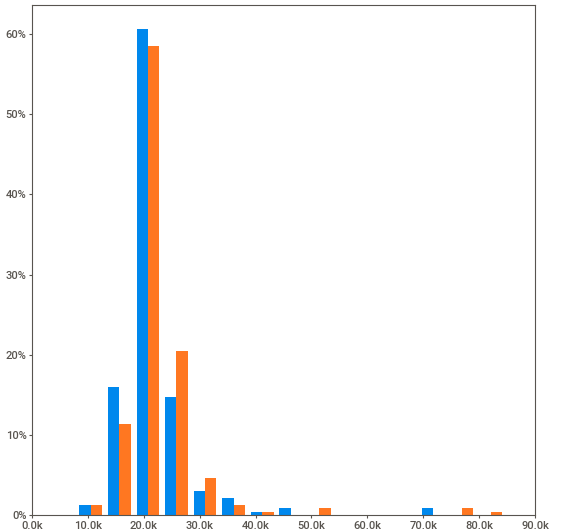
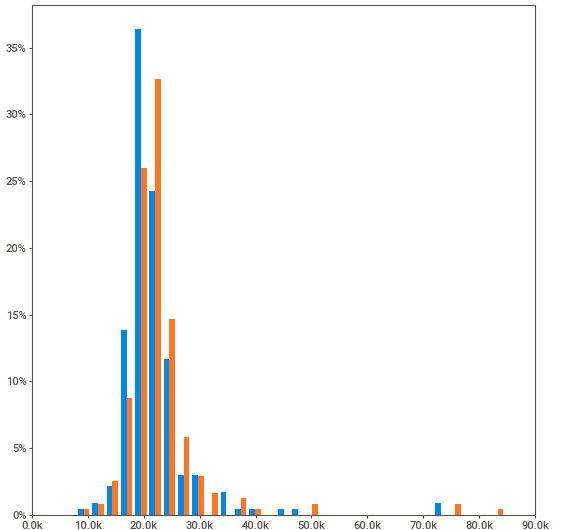
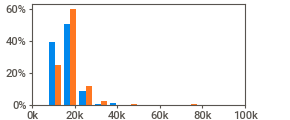
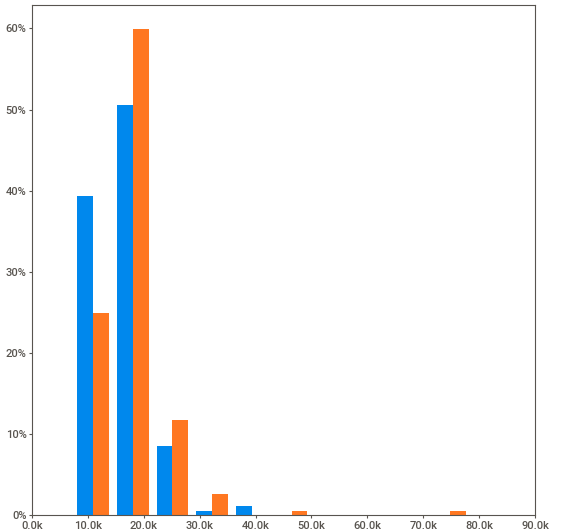
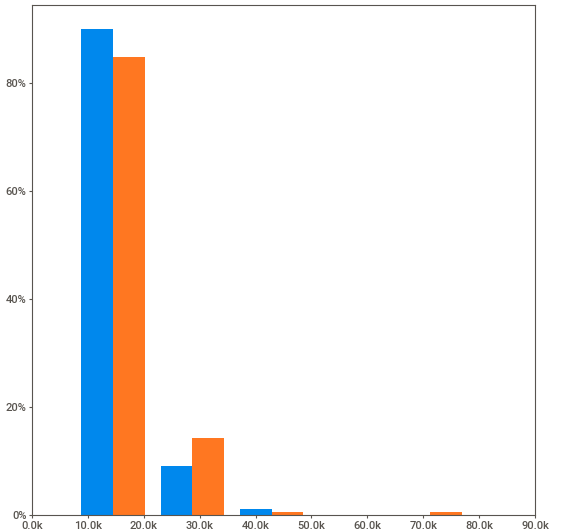
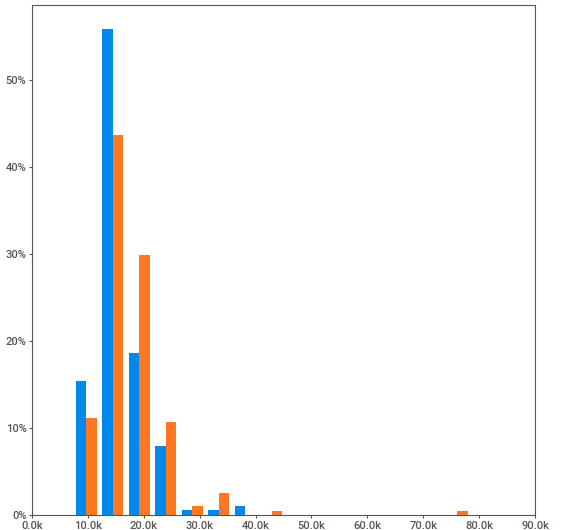
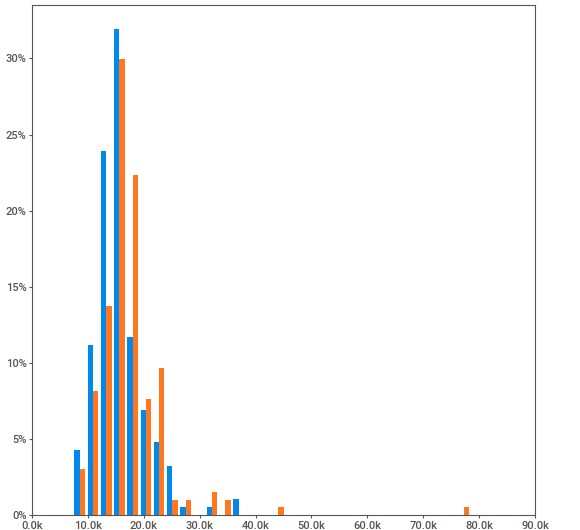
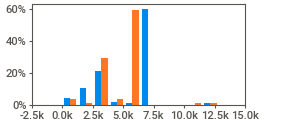
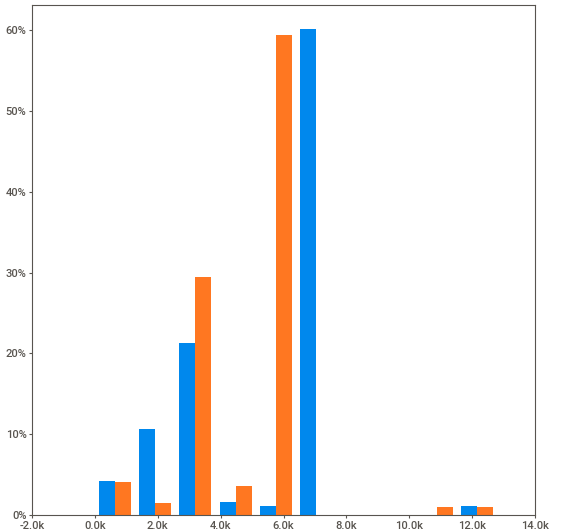
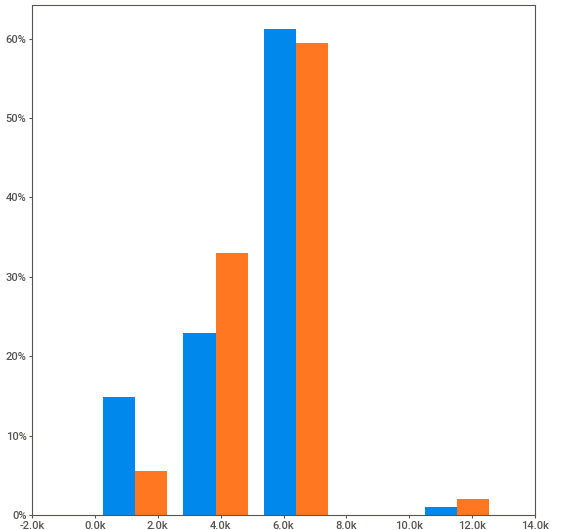
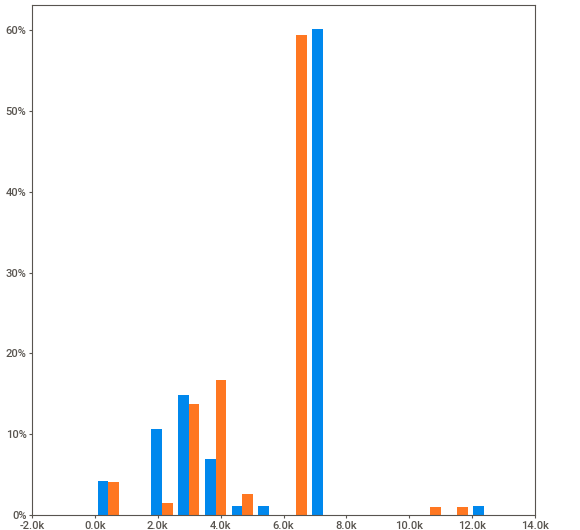
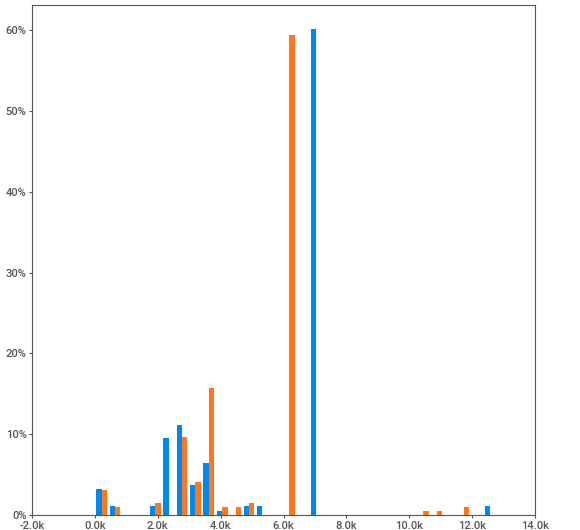
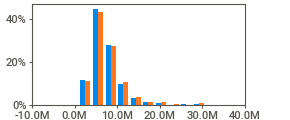
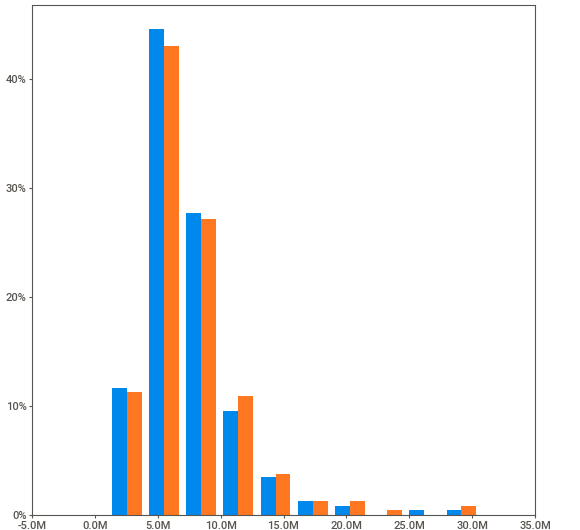
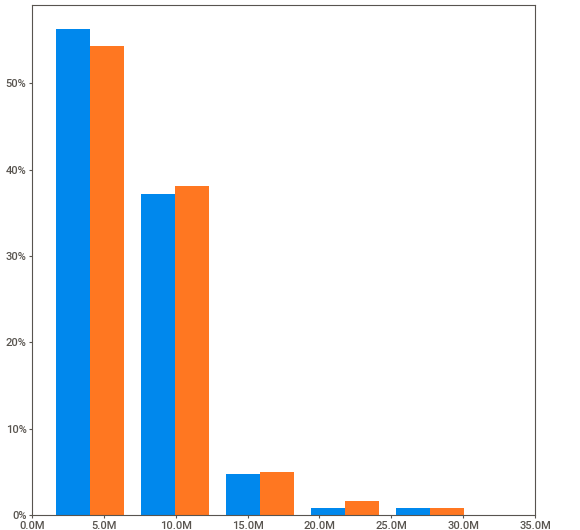
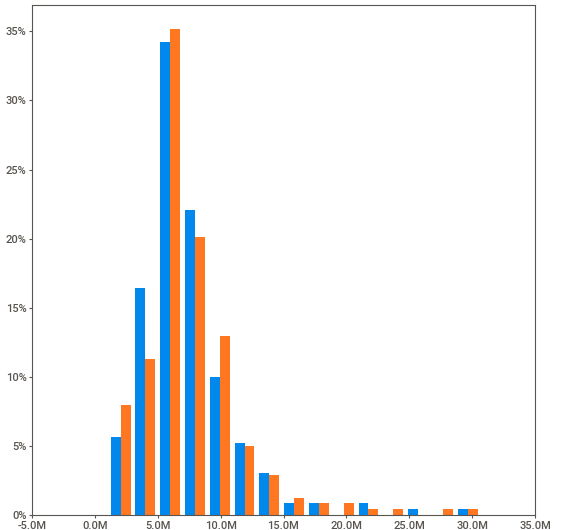
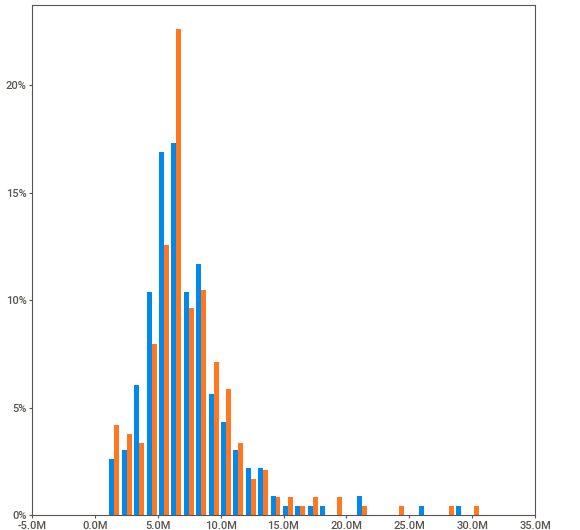
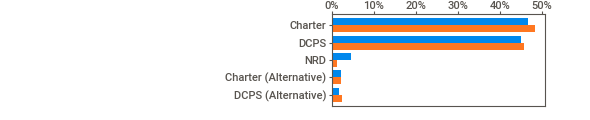
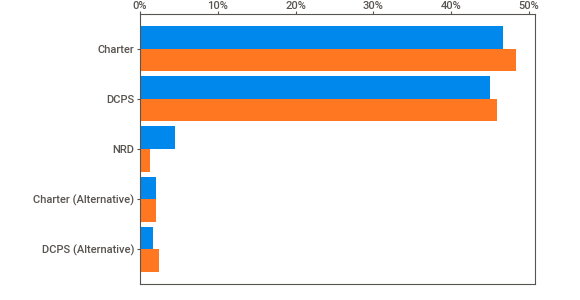
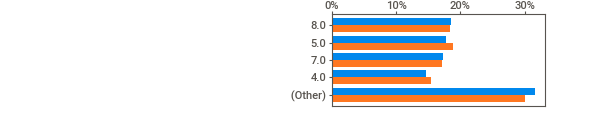
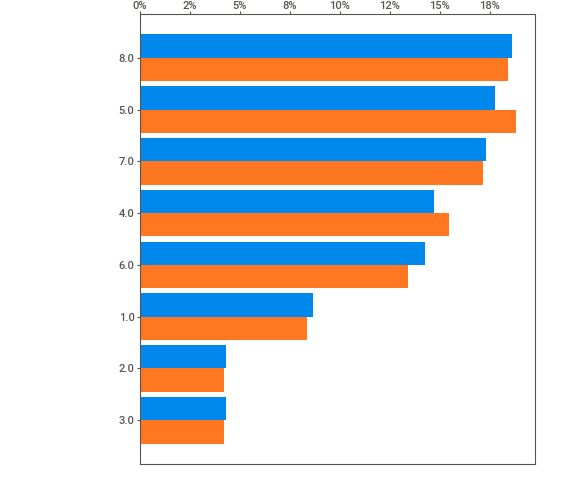
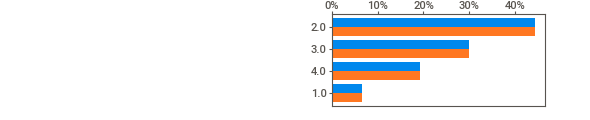
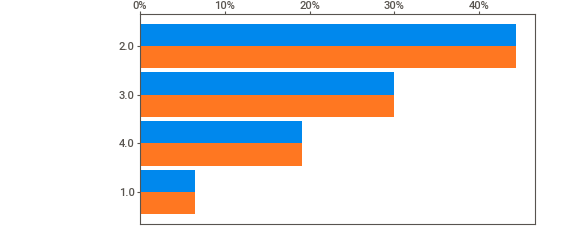
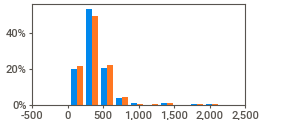
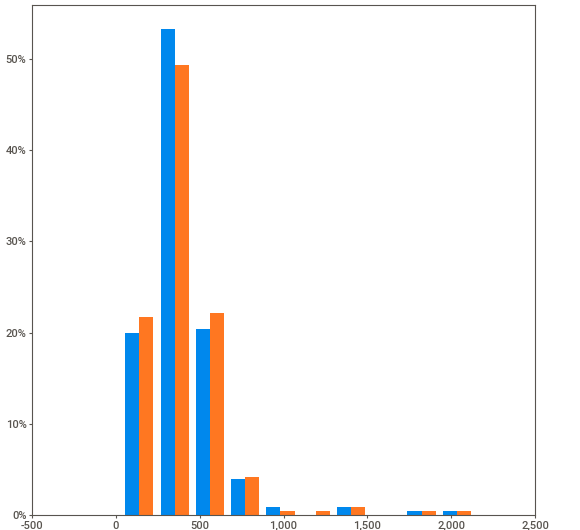
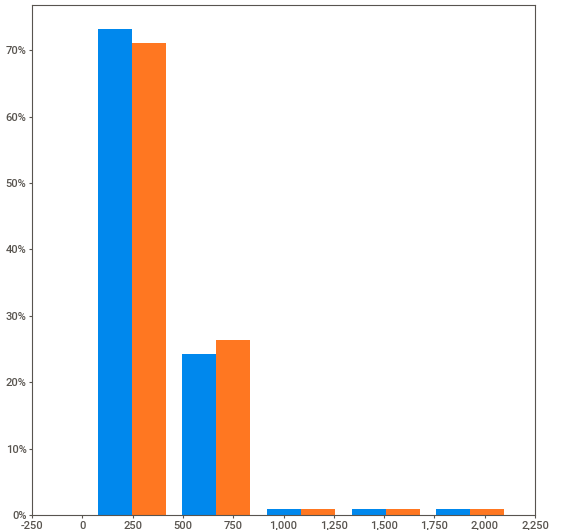
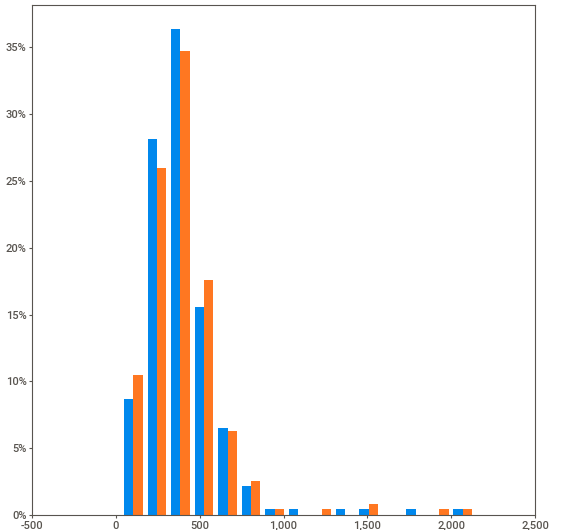
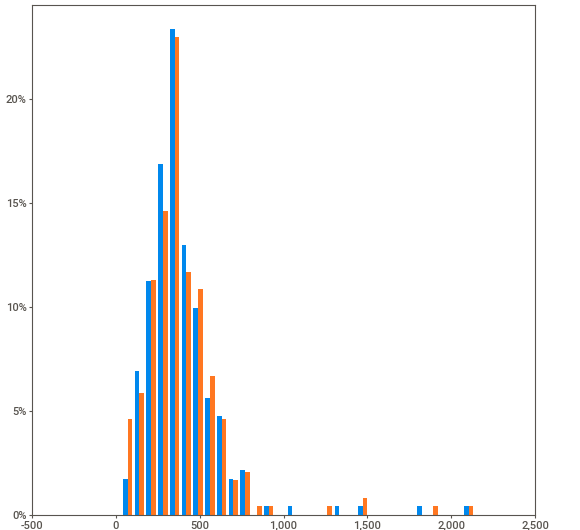
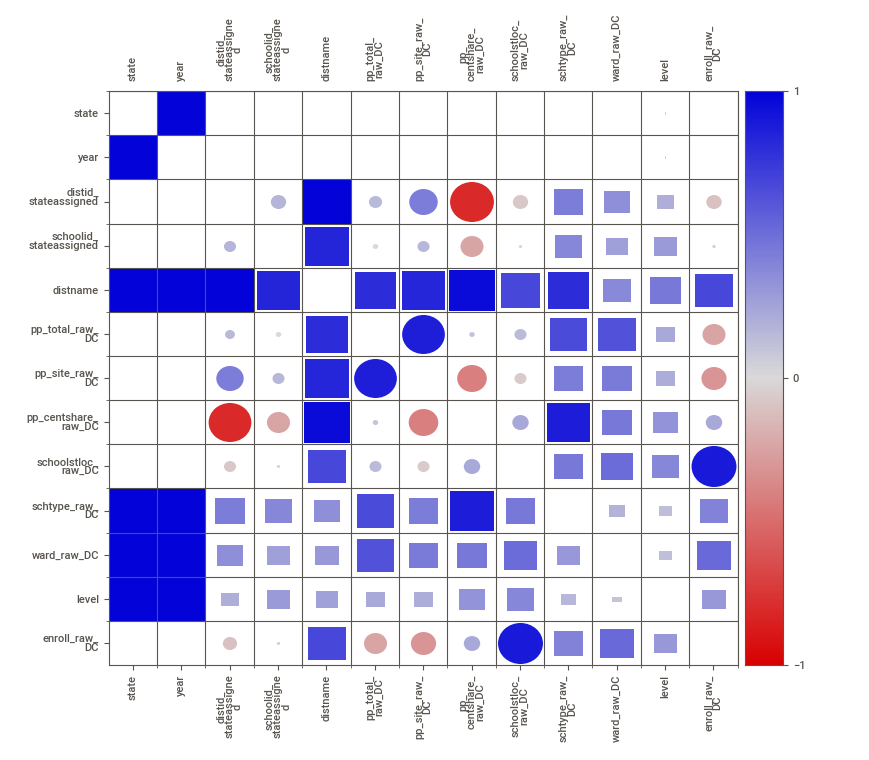
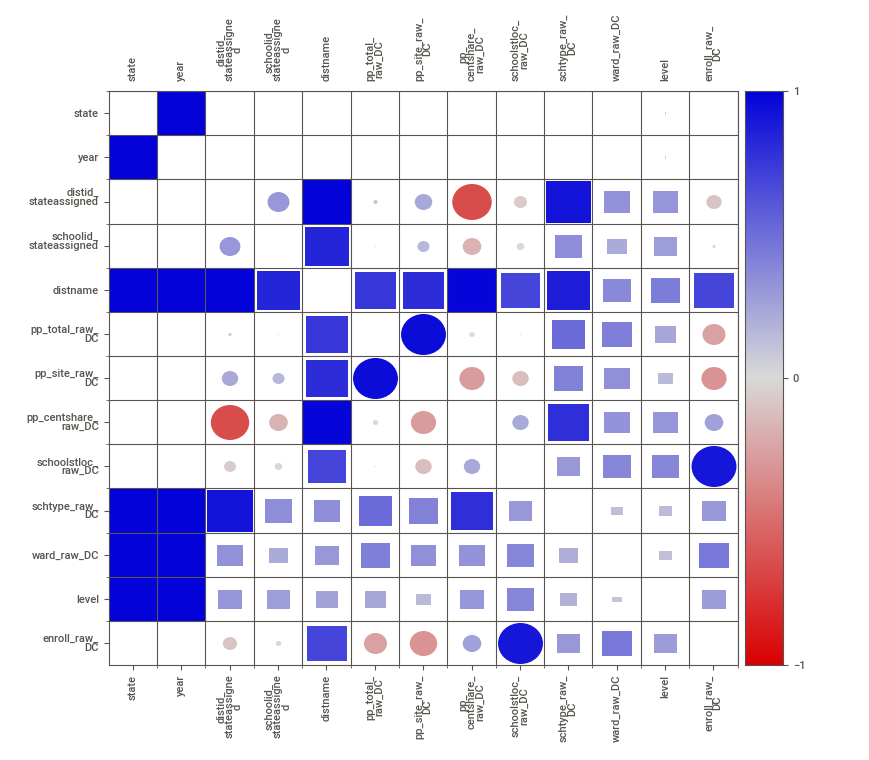

In [25]:
nces_1819 = pd.read_excel("../Dataset/NCES/DC_1819.xlsx")
nces_1819 = nces_process(nces_1819)
nces_1920=pd.read_excel("../Dataset/NCES/DC_1920.xlsx")
nces_1920 = nces_process(nces_1920)

nces_cmp = sv.compare(nces_1819, nces_1920)
nces_cmp.show_notebook()

In [26]:
nces = pd.concat([nces_1819, nces_1920])
nces.shape

(484, 13)

## STAR

In [27]:
!ls "../Dataset/OSSEDC/2019"


'2019 DC School Report Card Aggregate Public Data_.xlsx'
'2019 Report Card_School Finance Public File.xlsx'


In [28]:
star_19 = pd.read_excel("../Dataset/OSSEDC/2019/2019 DC School Report Card Aggregate Public Data_.xlsx", sheet_name='STAR Scores')
star_18 = pd.read_csv('../Dataset/OSSEDC/2018/2018_School_STAR_Scores.csv')  
print(star_19.info())
print(star_18.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEA Code     206 non-null    int64  
 1   LEA Name     206 non-null    object 
 2   School Code  206 non-null    int64  
 3   School Name  206 non-null    object 
 4   School Type  206 non-null    object 
 5   Ward         206 non-null    int64  
 6   STAR Score   206 non-null    float64
 7   STAR Rating  206 non-null    int64  
 8   School Year  206 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 14.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEA_Code     203 non-null    int64  
 1   LEA_Name     203 non-null    object 
 2   School_Code  203 non-null    int64  
 3   School_Name  203 non-null    object 
 4   Schoo

In [29]:
star_19.columns = star_19.columns.str.replace(" ", "_")
star_19 = star_19.drop(['School_Year'], axis=1)
star_18 = star_18.drop(['ObjectId'], axis=1)
print(star_19.info())
print(star_18.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEA_Code     206 non-null    int64  
 1   LEA_Name     206 non-null    object 
 2   School_Code  206 non-null    int64  
 3   School_Name  206 non-null    object 
 4   School_Type  206 non-null    object 
 5   Ward         206 non-null    int64  
 6   STAR_Score   206 non-null    float64
 7   STAR_Rating  206 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 13.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEA_Code     203 non-null    int64  
 1   LEA_Name     203 non-null    object 
 2   School_Code  203 non-null    int64  
 3   School_Name  203 non-null    object 
 4   School_Type  203 non-null    object 
 5   Ward 

                                             |          | [  0%]   00:00 -> (? left)


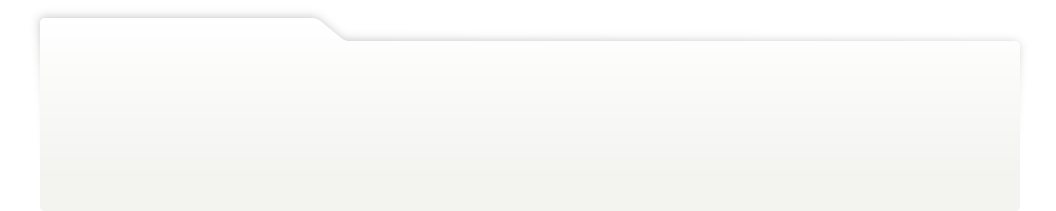
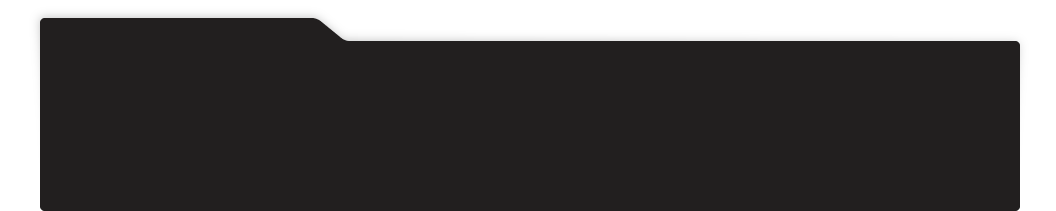
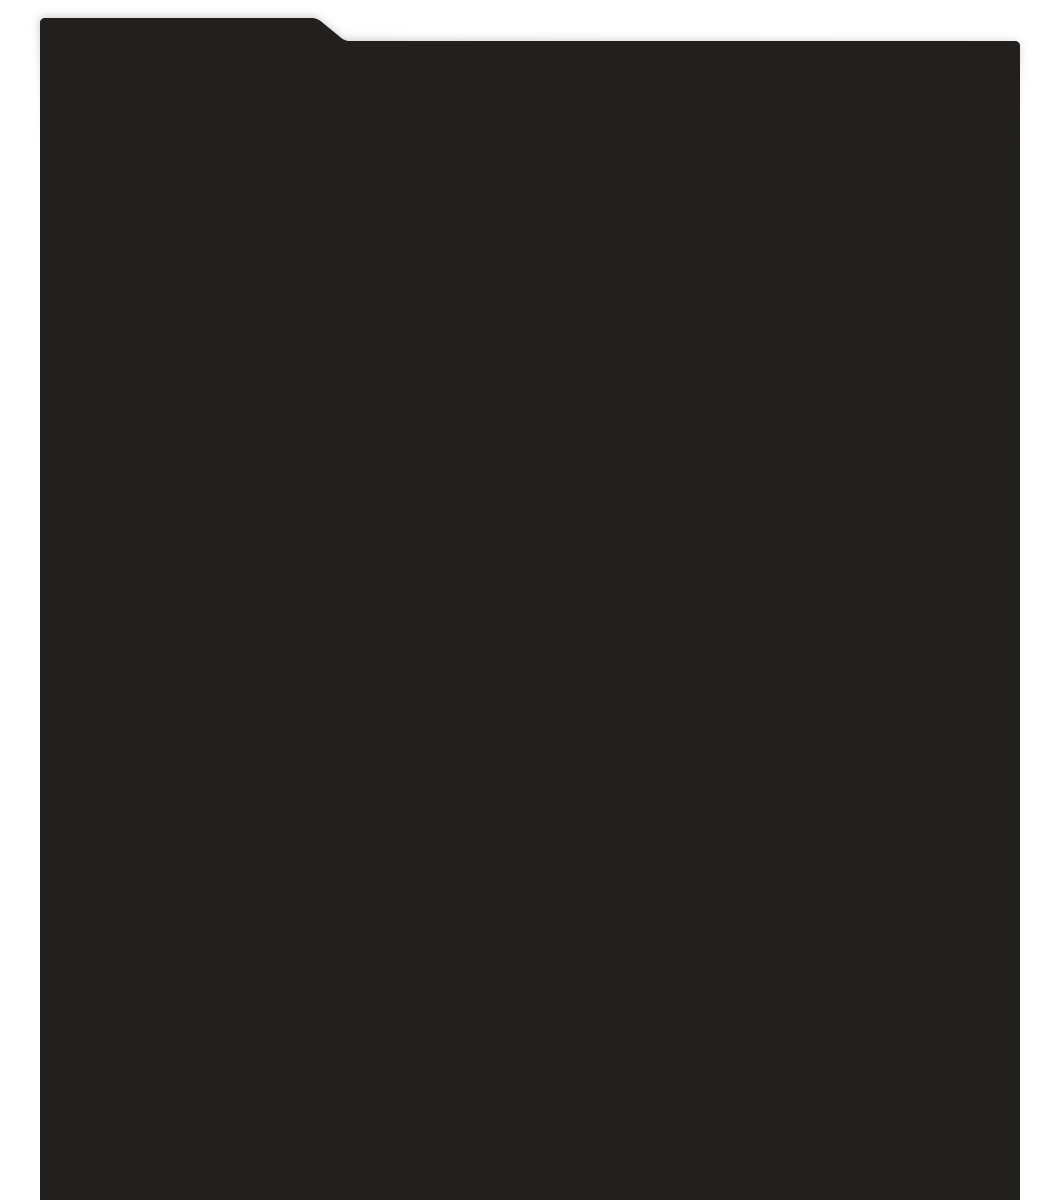
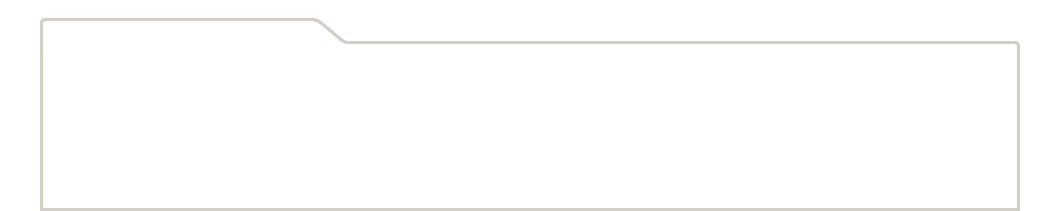
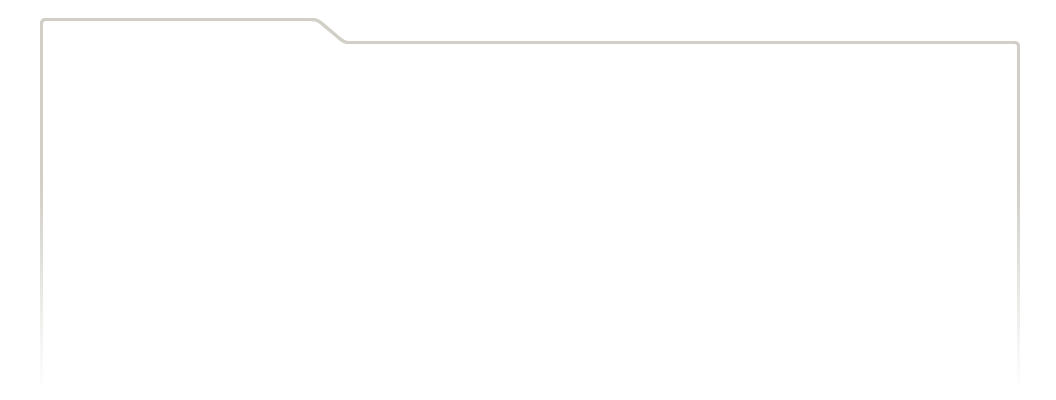
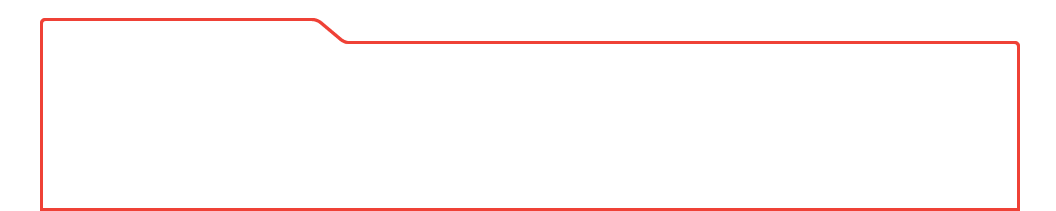
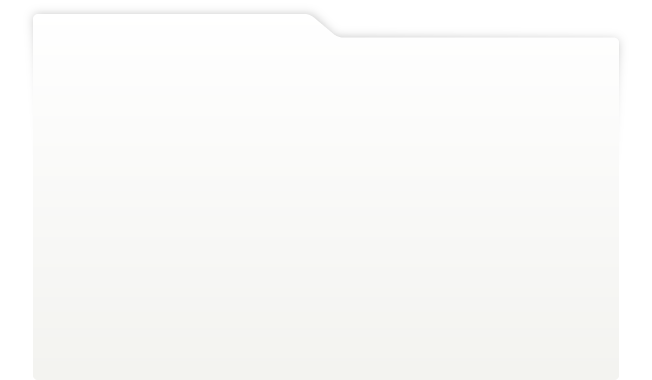
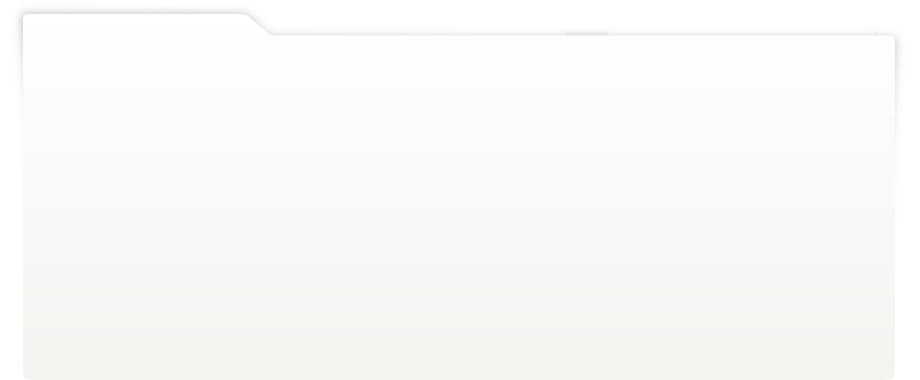
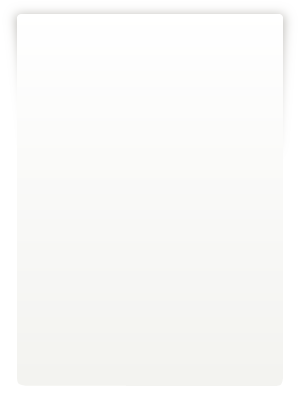
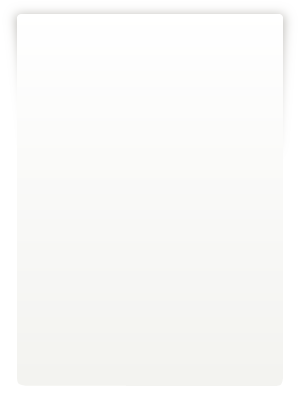
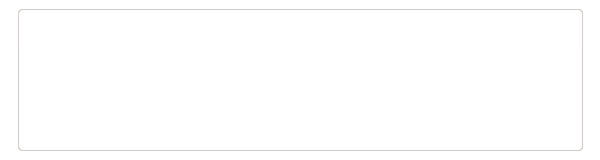
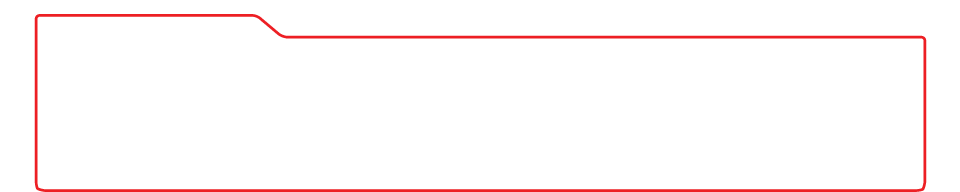
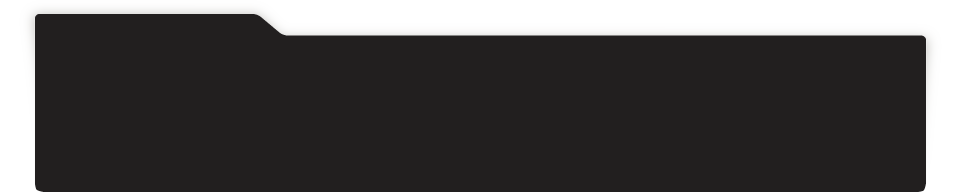
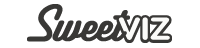
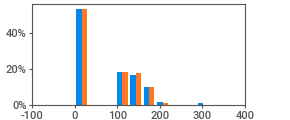
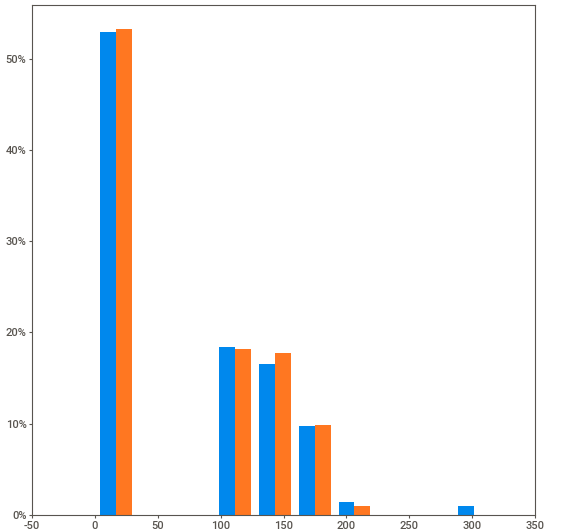
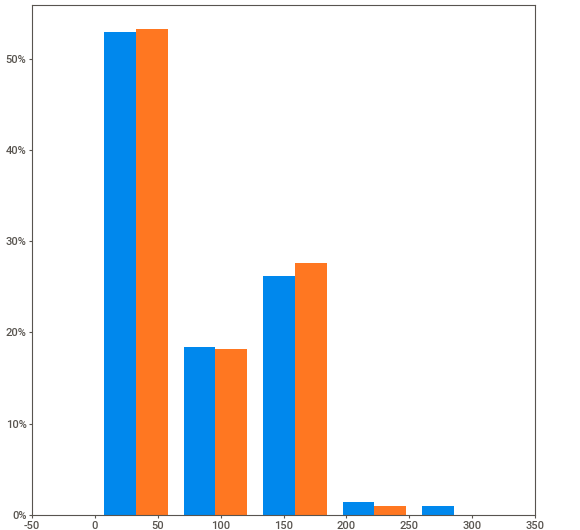
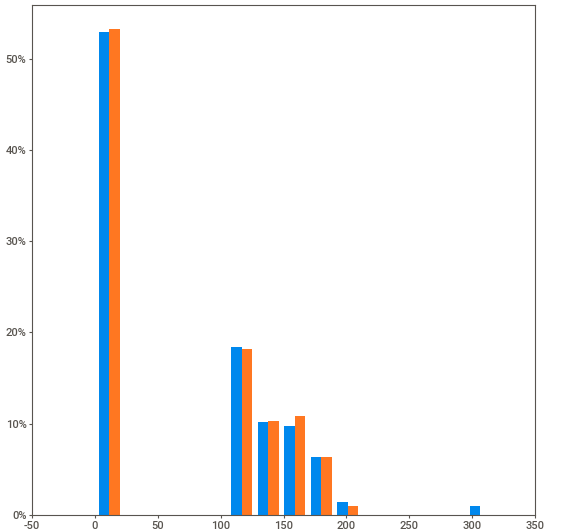
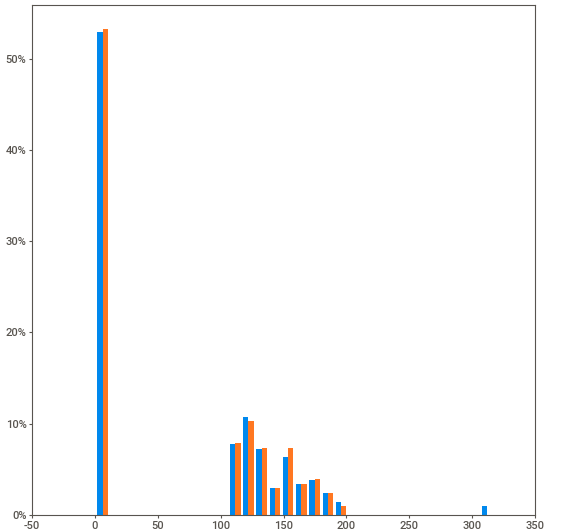
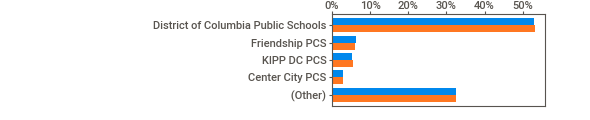
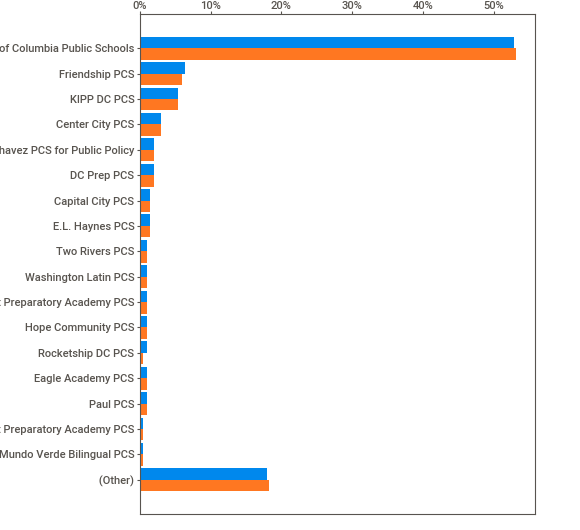
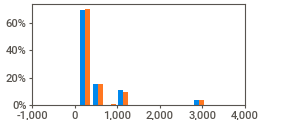
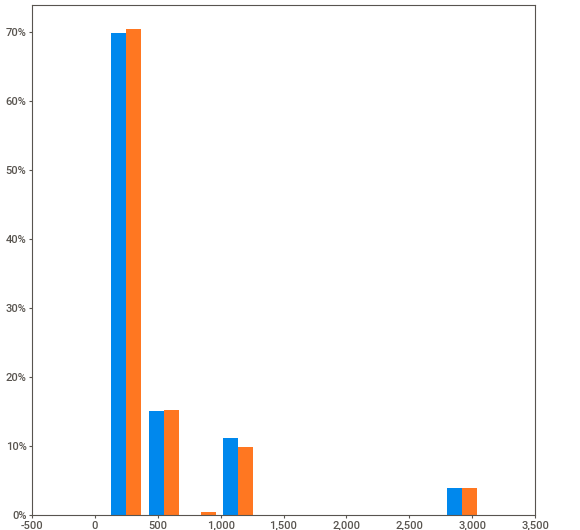
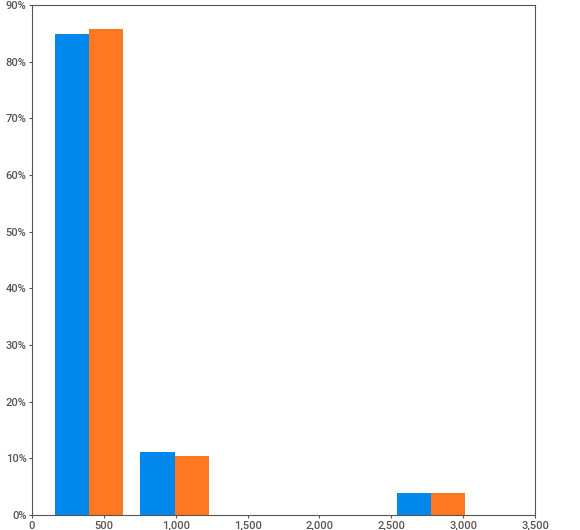
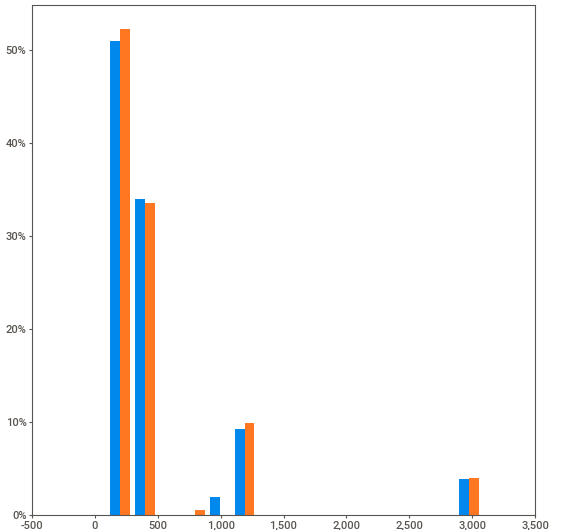
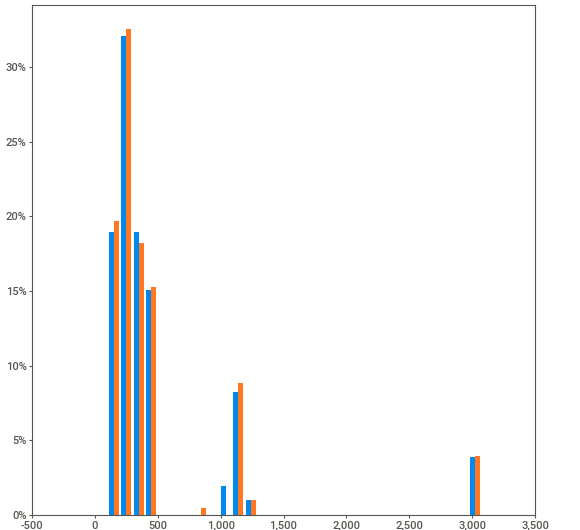
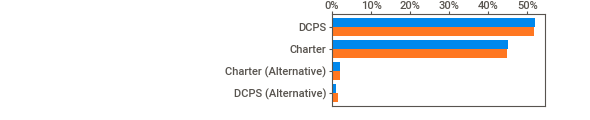
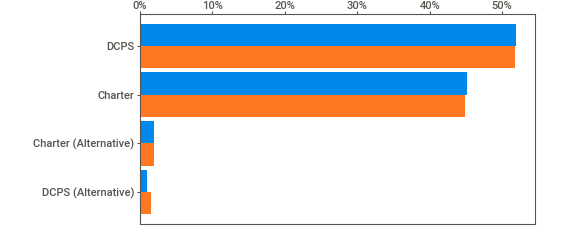
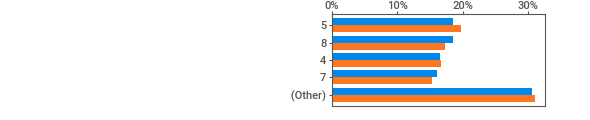
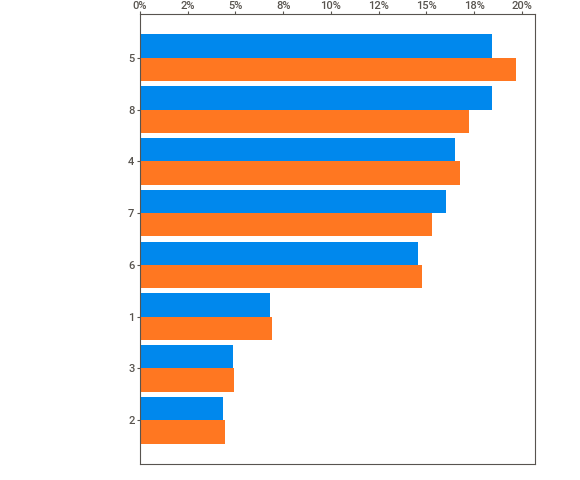
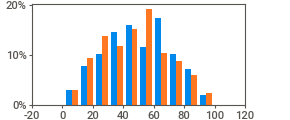
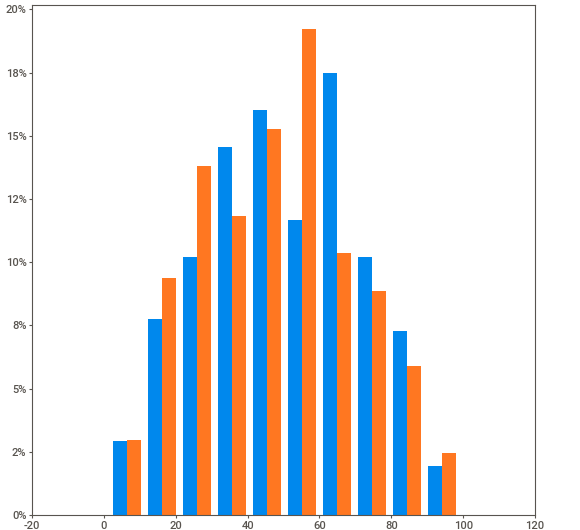
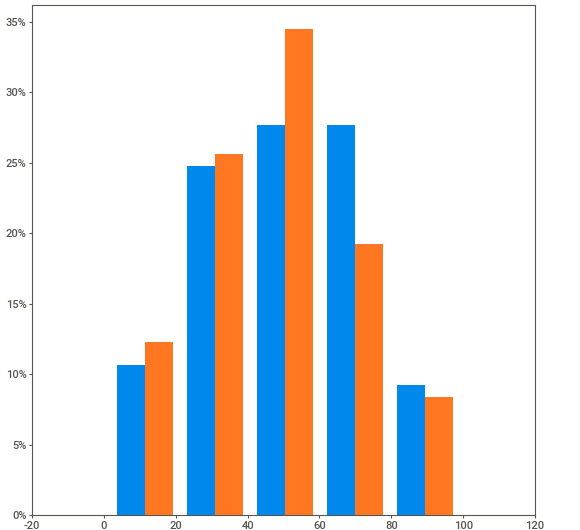
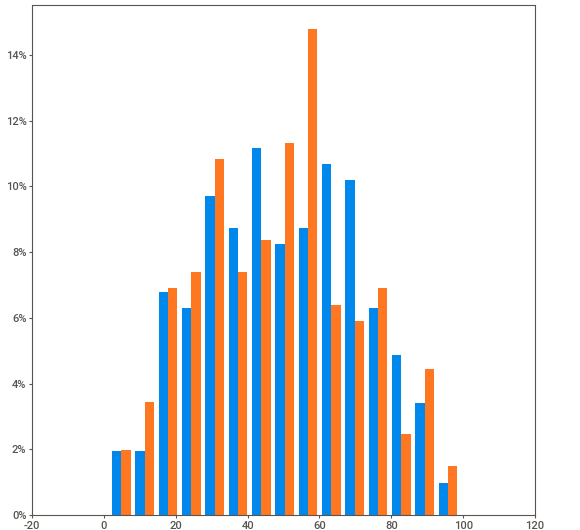
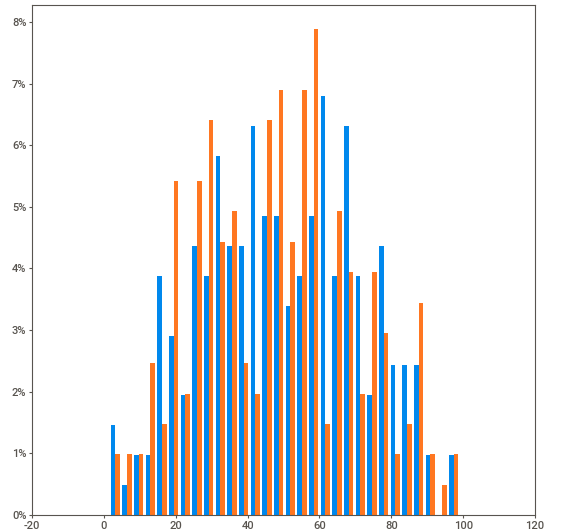
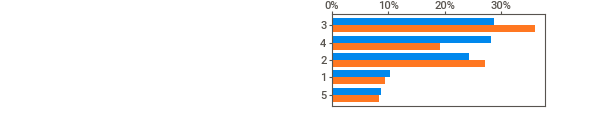
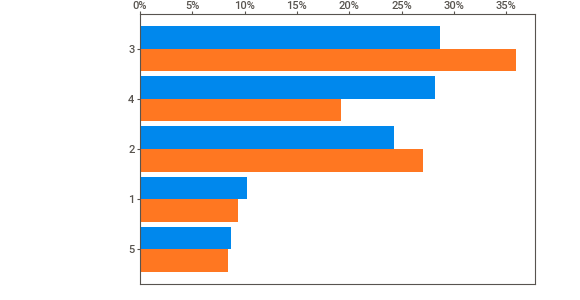
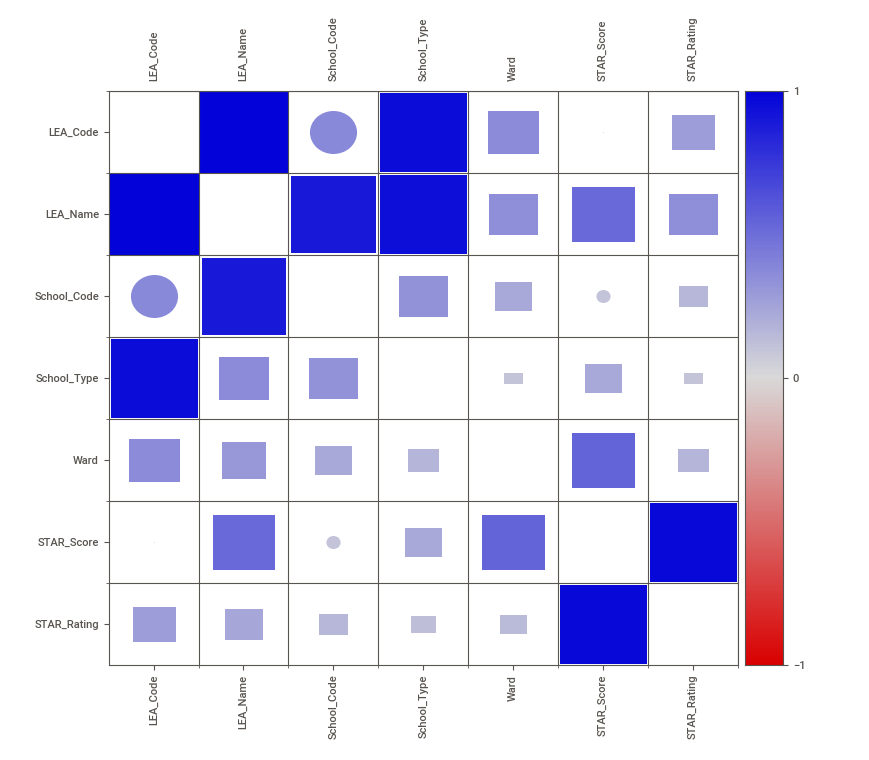
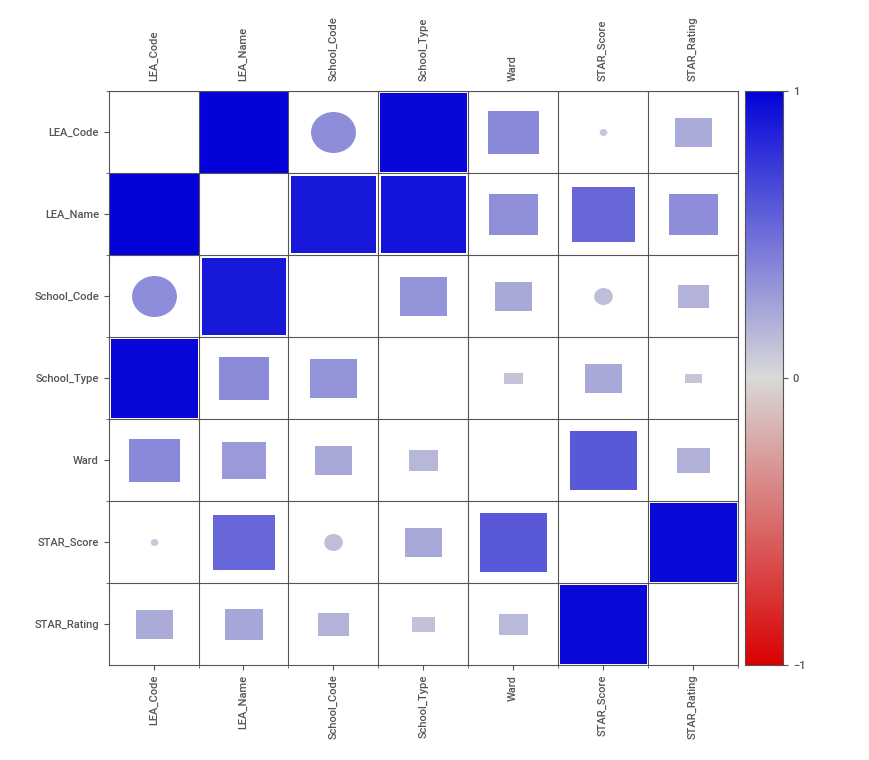

In [30]:
star_cmp = sv.compare(star_19, star_18)
star_cmp.show_notebook()